**IMPORT RELEVENT LIBRARIES**

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

**MOUNT THE GOOGLE DRIVE**

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**CHANGE THE WORKING DIRECTORY**

In [28]:
os.chdir("/content/drive/My Drive/Colab Notebooks/Deep Learning/")
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Deep Learning'

**LOAD AND DISPLAY AN IMAGE**

In [29]:
#Image path
img = image.load_img("Letters/Aa/Aa (1).jpeg")

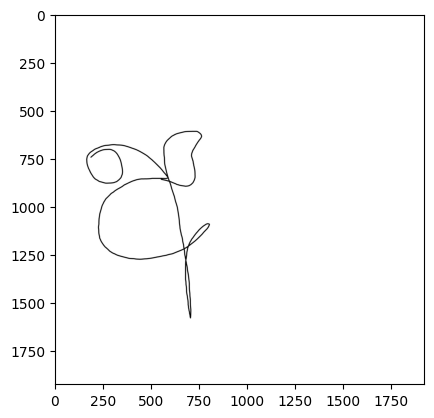

In [30]:
#Display the image
plt.imshow(img)

In [31]:
# Read the image using OpenCV (cv2) and retrieve its shape
cv2.imread("Letters/Aa/Aa (1).jpeg").shape

(1925, 1925, 3)

In [32]:
# Rescale pixel values
train = ImageDataGenerator(rescale = 1/255)
# Validate pixel values
validation = ImageDataGenerator(rescale = 1/255)

**VALIDATE DATASETS**

In [33]:
# Training dataset generator using the training ImageDataGenerator
train_dataset = train.flow_from_directory('Letters/',
                                          target_size = (200,200),
                                          batch_size = 4,
                                          class_mode = 'binary')

Found 80 images belonging to 2 classes.


In [34]:
# Create a validation dataset generator using the validation ImageDataGenerator
validation_dataset = validation.flow_from_directory('Validate/',
                                                   target_size = (200,200),
                                                   batch_size = 4,
                                                   class_mode = 'binary')

Found 80 images belonging to 2 classes.


In [35]:
# Retrieve the mapping of class names
train_dataset.class_indices

{'Aa': 0, 'Ya': 1}

In [36]:
# Retrieve the array of class indices
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [37]:
# Sequential model create
#And
# Convolutional layer with 16 filters, each of size (3, 3), and ReLU activation
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   # MaxPooling layer pool size (2, 2)
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 32 filters (3,3)
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 64 filters (3,3)
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Flatten layer
                                    tf.keras.layers.Flatten(),
                                   # Dense layer with 512 units
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                   # Output layer with 1 unit
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    ])

In [38]:
# Compile the model
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])

**TRAINING THE MODEL**

In [39]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 1,
                      epochs = 30,
                      validation_data = validation_dataset)

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 0.7192 - accuracy: 0.2500 - val_loss: 6.0879 - val_accuracy: 0.5000
Epoch 2/30
1/1 [==============================] - 2s 2s/step - loss: 5.8300 - accuracy: 0.5000 - val_loss: 0.9689 - val_accuracy: 0.5000
Epoch 3/30
1/1 [==============================] - 3s 3s/step - loss: 0.9797 - accuracy: 0.5000 - val_loss: 0.6861 - val_accuracy: 0.5000
Epoch 4/30
1/1 [==============================] - 2s 2s/step - loss: 0.7057 - accuracy: 0.5000 - val_loss: 0.6611 - val_accuracy: 0.5125
Epoch 5/30
1/1 [==============================] - 6s 6s/step - loss: 0.6541 - accuracy: 0.5000 - val_loss: 0.6184 - val_accuracy: 0.8625
Epoch 6/30
1/1 [==============================] - 2s 2s/step - loss: 0.6061 - accuracy: 1.0000 - val_loss: 0.5639 - val_accuracy: 0.6375
Epoch 7/30
1/1 [==============================] - 3s 3s/step - loss: 0.5149 - accuracy: 0.7500 - val_loss: 0.4713 - val_accuracy: 0.8375
Epoch 8/30
1/1 [=========================

In [40]:
# Retrieve the mapping of class names
validation_dataset.class_indices

{'Aa': 0, 'Ya': 1}

**TESTING SALPLES**

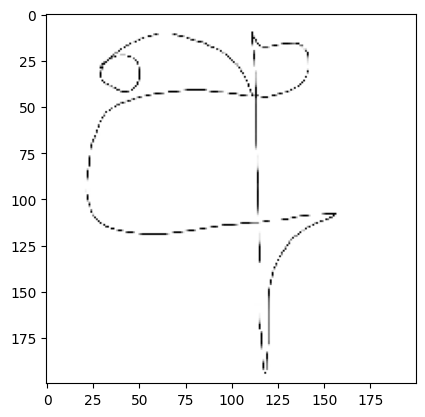

1/1 [==============================] - 0s 40ms/step
This is Letter 'අ'


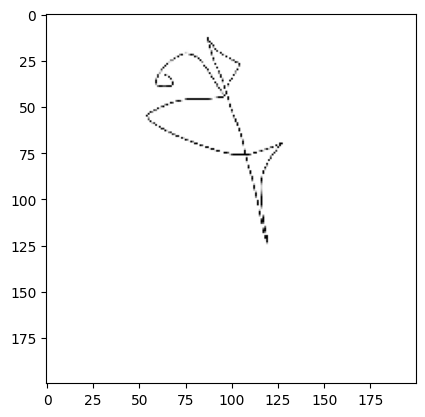

1/1 [==============================] - 0s 37ms/step
This is Letter 'අ'


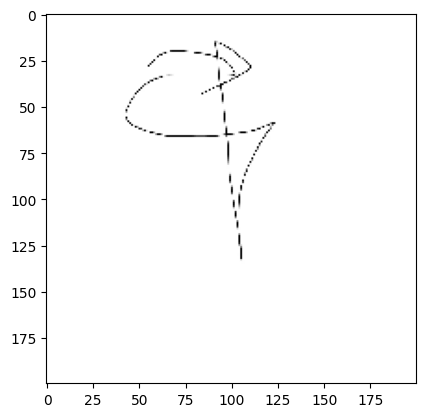

1/1 [==============================] - 0s 36ms/step
This is Letter 'අ'


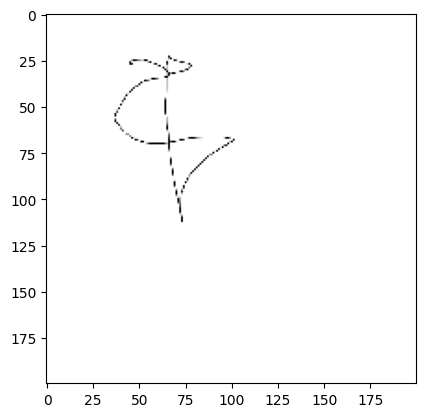

1/1 [==============================] - 0s 35ms/step
This is Letter 'අ'


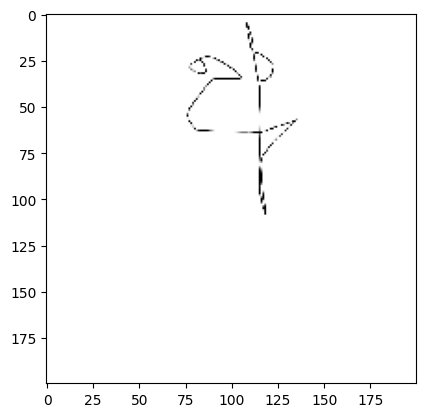

1/1 [==============================] - 0s 37ms/step
This is Letter 'අ'


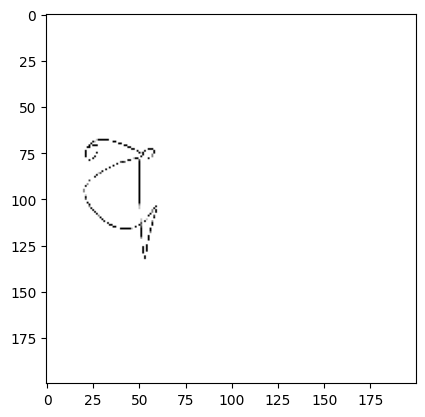

1/1 [==============================] - 0s 35ms/step
This is Letter 'අ'


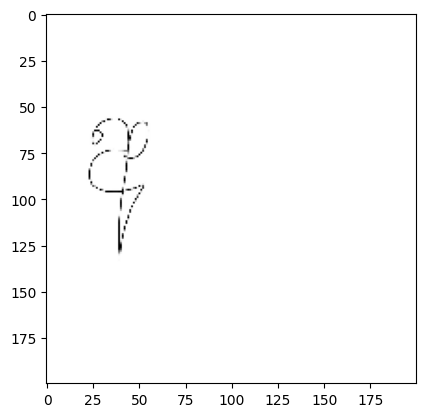

1/1 [==============================] - 0s 37ms/step
This is Letter 'අ'


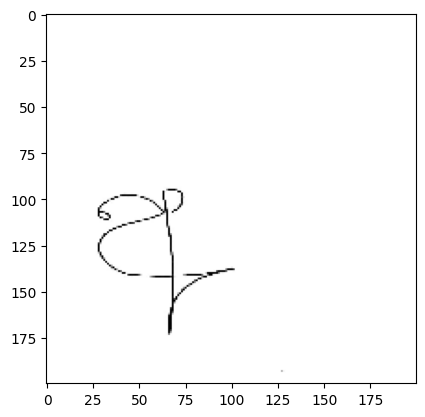

1/1 [==============================] - 0s 36ms/step
This is Letter 'අ'


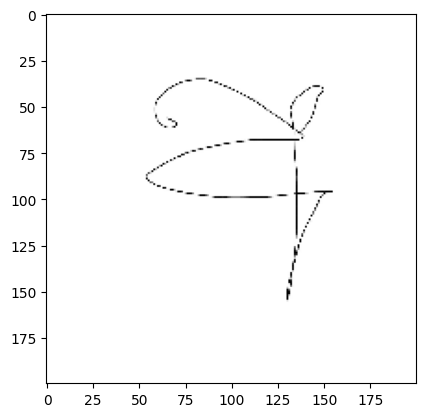

1/1 [==============================] - 0s 36ms/step
This is Letter 'අ'


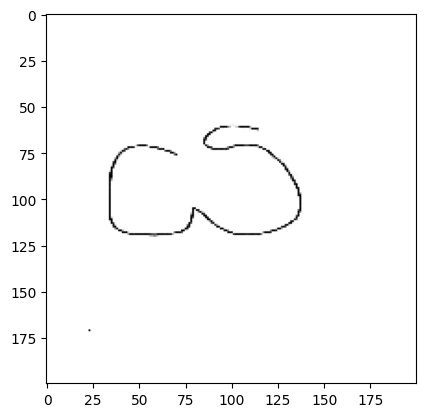

1/1 [==============================] - 0s 37ms/step
This is Letter 'ය'


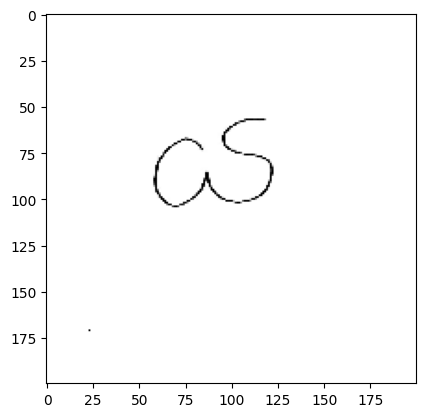

1/1 [==============================] - 0s 36ms/step
This is Letter 'ය'


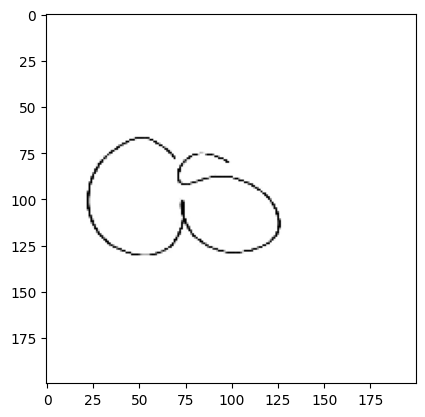

1/1 [==============================] - 0s 38ms/step
This is Letter 'ය'


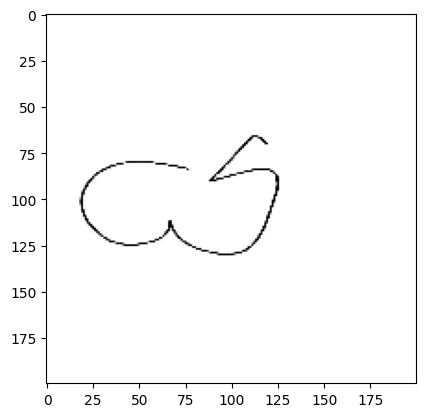

1/1 [==============================] - 0s 38ms/step
This is Letter 'ය'


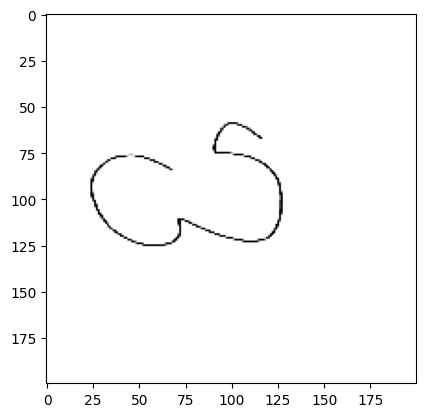

1/1 [==============================] - 0s 38ms/step
This is Letter 'ය'


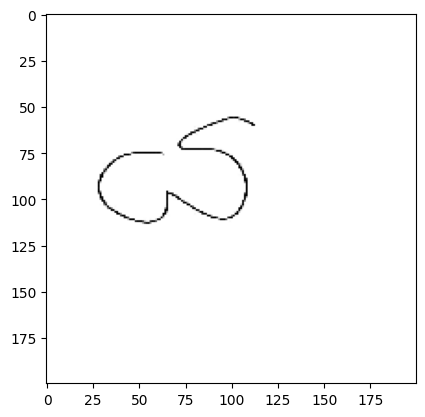

1/1 [==============================] - 0s 40ms/step
This is Letter 'ය'


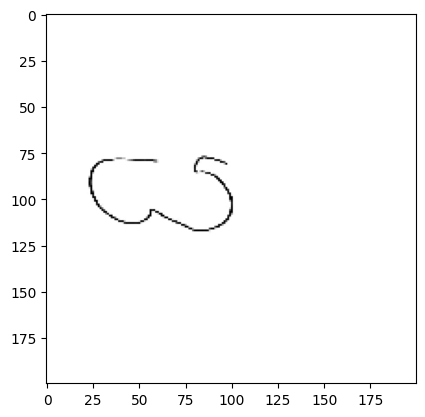

1/1 [==============================] - 0s 36ms/step
This is Letter 'ය'


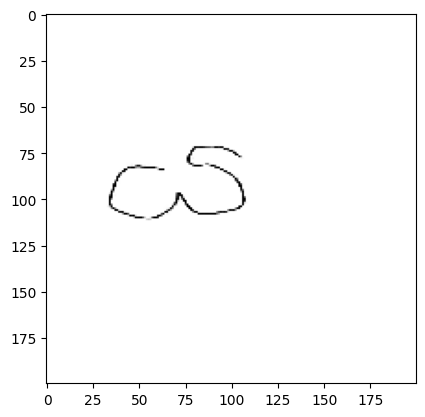

1/1 [==============================] - 0s 42ms/step
This is Letter 'ය'


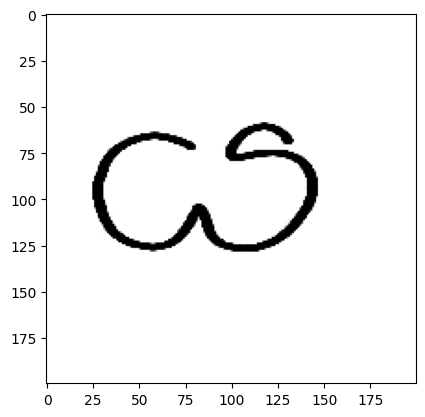

1/1 [==============================] - 0s 35ms/step
This is Letter 'ය'


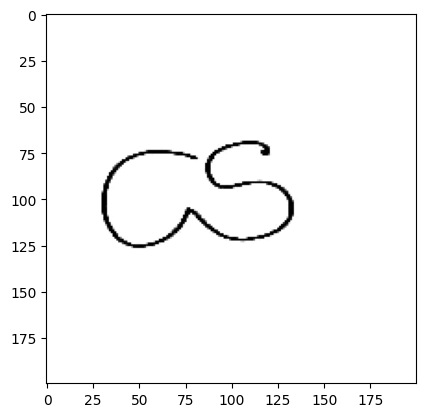

1/1 [==============================] - 0s 46ms/step
This is Letter 'ය'


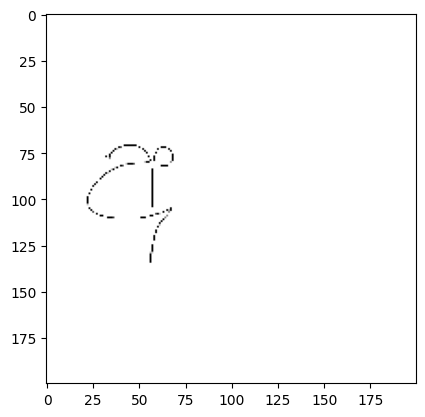

1/1 [==============================] - 0s 40ms/step
This is Letter 'අ'


In [45]:
# Path
dir_path = 'Testing/'


for i in os.listdir(dir_path):
  img = image.load_img(dir_path+ i,target_size=(200,200))
  plt.imshow(img)
  plt.show()

# Convert
  X = image.img_to_array(img)
  X = np.expand_dims(X,axis = 0)
# Stack (Vertical)
  images = np.vstack([X])
# Predict
  val = model.predict(images)
# Predicted output value
  if val == 0:
    print("This is Letter 'අ'")
  else:
    print("This is Letter 'ය'")